# A Study of Significant Volcanic Eruptions
### by Jaqueline Dias
Student Number: 501074392
<br>
Supervisor’s name: Ashok Bhowmick, Ph. D
<br>
Submission Date: 03/07/2022
<br>
Repository link: https://github.com/JaqueD/Capstone-Project

**Summary of Initial Results**
<br>
<br>
At the Initial Results I have analyzed both datasets used in this project and merged them. Next, I delete duplicates and rename remainig features. Given the long period of the dataframe I filter entries from 1020 to the newest records from 2020, another filter is added in this phase to make sure all the eruptions being analyzed have been confirmed.
At this point I know my dataset has some na's that I'll treat further on. I analyze the correlation between the variables and then I continue cleaning the data. I export the dataset to Excel where all records with missing VEI are treated as follows:
<br>
- for VEI missing, I will be using the last eruption VEI record per volcano to replace it;
- when last record is not available I will use the subsequent eruption;
- in cases where volcano had a unique eruption or multiple eruptions with no historical VEI recorded, those entries will be dropped;
<br>
<br>
The next na's to be treated are in the variables start_day, start_month, end_day, end_month and end_year. For the sake of this study, the granularity chosen was year and month, therefore the day variables are dropped. I created the following criteria to treat missing month and year entries:
<br>
<br>
- average duration of each eruption for each volcano which has complete date data (start month/year and end month/year);<br>
- average start month for each eruption for each volcano;
- fill in start month where missing and apply average duration;
<br>
<br>
Once this phase is finalized the dataset is clean and I analyze the distribution of the numerical variables.
At this point I start to treat the categorial variables to transform them into numerical variables using One Hot Encoding. This variables will be used in the next stage of this study when models will be applied in the dataset to create predictions.
Lastly, there is the exploratory analyses applied to the significant volcanic eruptions. I consider eruptions of VEI 5 and above significant given their damage to society and the environment.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading datasets
df1 = pd.read_csv('Downloads/eruptions.csv')
df2 = pd.read_csv('Downloads/volcano.csv')

In [3]:
df1.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

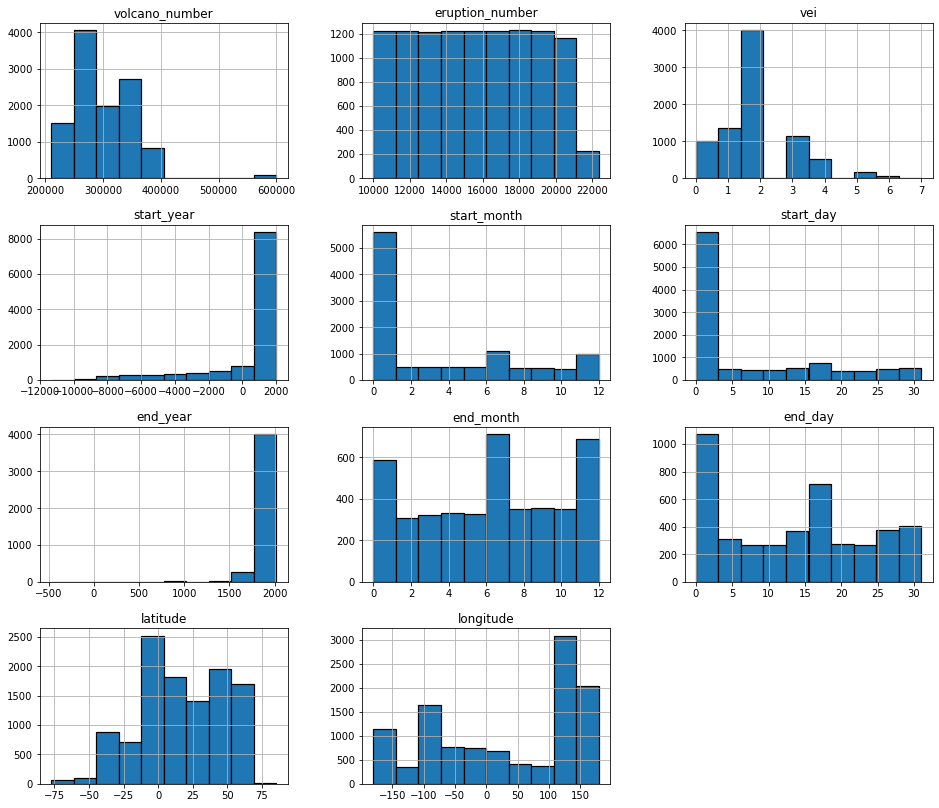

In [5]:
df1.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,14)
plt.show()

In [6]:
df2.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,,Dacite,,,,,0,70,4019,393303


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

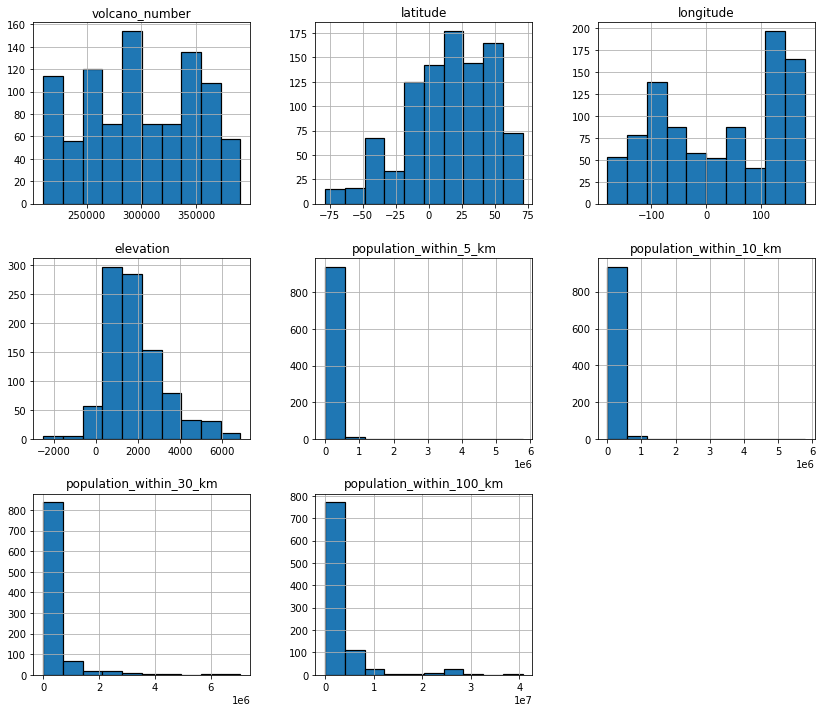

In [8]:
df2.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

In [9]:
# Merging datasets (inner join)
df = pd.merge(df1, df2, on='volcano_number', how='inner')
df.head()

,volcano_number,volcano_name_x,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,...,,,,,,,4724,69991,501336,1696768
1,266030,Soputan,22293,Confirmed Eruption,NaN,3.0,2018.0,10.0,2.0,Historical Observations,...,,,,,,,4724,69991,501336,1696768
2,266030,Soputan,22105,Confirmed Eruption,NaN,3.0,2016.0,1.0,2.0,Historical Observations,...,,,,,,,4724,69991,501336,1696768
3,266030,Soputan,20988,Confirmed Eruption,NaN,3.0,2015.0,1.0,6.0,Historical Observations,...,,,,,,,4724,69991,501336,1696768
4,266030,Soputan,20821,Confirmed Eruption,NaN,3.0,2012.0,8.0,26.0,Historical Observations,...,,,,,,,4724,69991,501336,1696768


In [11]:
# Dropping duplicate features and renaming the remaining ones
df = df.drop(columns=['volcano_name_y', 'latitude_y', 'longitude_y'])
df.rename(columns={'volcano_name_x': 'volcano_name','latitude_x':'latitude', 'longitude_x':'longitude'}, inplace=True)
df.describe()

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude,elevation,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
count,9559.000000,9559.000000,7160.000000,9558.000000,9388.000000,9385.000000,3694.000000,3691.000000,3688.000000,9559.000000,9559.000000,9559.000000,9.559000e+03,9.559000e+03,9.559000e+03,9.559000e+03
mean,297785.872058,15621.177738,1.985196,622.349550,3.425543,6.987001,1911.475095,6.232999,13.163232,17.253244,35.830301,2217.471074,3.692338e+04,5.578794e+04,4.302366e+05,3.632130e+06
std,47083.600232,3264.400545,1.143706,2455.974644,4.067385,9.657412,167.349809,3.701593,9.838150,30.936030,112.232832,1326.973598,2.607263e+05,2.693210e+05,8.494366e+05,6.598072e+06
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000,-2500.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,263300.000000,12806.500000,1.000000,640.000000,0.000000,0.000000,1893.250000,3.000000,3.000000,-6.137000,-72.496000,1281.000000,6.000000e+00,7.000000e+01,1.718000e+03,6.399900e+04
50%,285040.000000,15644.000000,2.000000,1838.000000,1.000000,0.000000,1953.000000,6.000000,14.500000,19.421000,55.708000,1974.000000,3.280000e+02,3.122000e+03,6.297400e+04,7.178200e+05
75%,342110.000000,18302.500000,2.000000,1946.000000,7.000000,15.000000,1990.000000,9.000000,21.000000,40.656000,139.231500,3008.000000,3.032000e+03,2.305900e+04,4.447370e+05,3.631492e+06
max,390140.000000,22354.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,71.082000,179.580000,6879.000000,5.783287e+06,5.783287e+06,6.735396e+06,4.064010e+07


For the interest of this study, only confirmed eruptions from 1020 to 2020 will be used.

In [12]:
# Filterig confirmed eruptions from 1020 to 2020
df_new = df[(df['start_year'] > 1020) & (df['eruption_category'] == "Confirmed Eruption")]
df_new.shape

(5930, 37)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5930 entries, 0 to 9079
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            5930 non-null   int64  
 1   volcano_name              5930 non-null   object 
 2   eruption_number           5930 non-null   int64  
 3   eruption_category         5930 non-null   object 
 4   area_of_activity          2810 non-null   object 
 5   vei                       5492 non-null   float64
 6   start_year                5930 non-null   float64
 7   start_month               5849 non-null   float64
 8   start_day                 5848 non-null   float64
 9   evidence_method_dating    5890 non-null   object 
 10  end_year                  3434 non-null   float64
 11  end_month                 3432 non-null   float64
 12  end_day                   3431 non-null   float64
 13  latitude                  5930 non-null   float64
 14  longitud

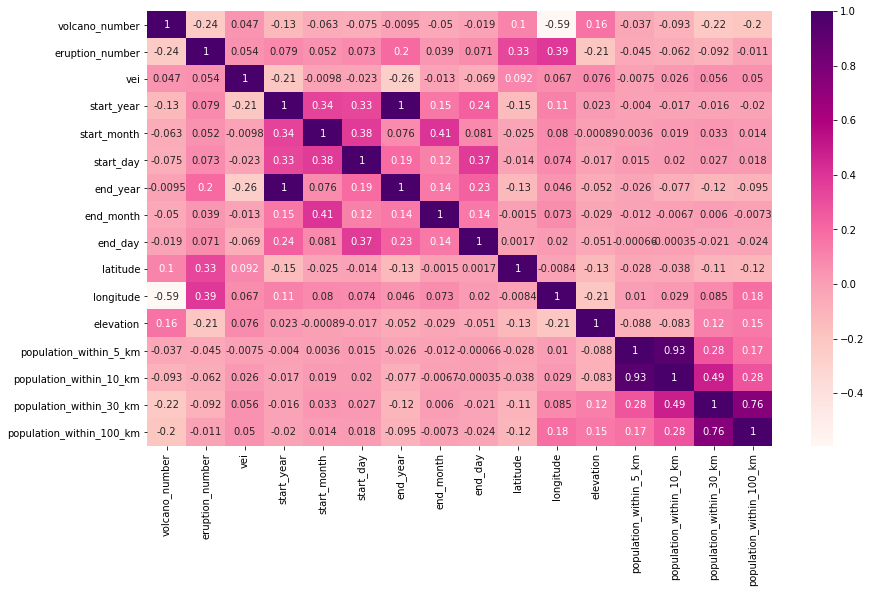

In [14]:
# Correlation matrix
plt.figure(figsize=(14,8))
sns.heatmap(df_new.corr(),annot=True, cmap='RdPu') 
plt.show()

Next, I will export the dataset to excel where I will analyze and treat cases of missing VEI as follows:
<br>
- For VEI missing, I will be using the last eruption VEI record per volcano to replace it. 
- When last record is not available I will use the subsequent eruption.
- In cases where volcano had a unique eruption or multiple eruptions with no historical VEI record, those entries will be dropped

In [15]:
# Exporting dataset
df_new.to_excel(r'Downloads/volcanoeruptions.xlsx', index = False)

In [16]:
# Importing dataset
df_new = pd.read_excel (r'Downloads/volcanoeruptions (1).xlsx')

For data entries missing start month, end month and year I will create parameters to determine:

- Average duration of each eruption for each volcano which has complete date data (start month/year and end month/year)
- Average start month for each eruption for each volcano
- Fill in start month where missing and apply average duration

In [18]:
import datetime

dur_col = ([])
start_month_list = ([])


# Filtering out missing start_month and getting mean start month by volcano_number
filt_df = df_new[(df_new['start_month'] > 0)]     
gb = filt_df.groupby('volcano_number', as_index=False)['start_month'].mean()
gb['start_month'] = gb['start_month'].astype(int)


# Iterating through dataframe to create a new "start_month_list"
# This list keeps any existing start months and assigns the average month to dates missing a start month using the lookup table created (gb)

for index_df,row_df in df_new.iterrows():
    flag = True # Create flag to deal with cases which do not have a start month or a lookup entry
    if row_df['start_month']>0:
        flag = False
        start_month_list.append(int(row_df['start_month']))
    else:
        for index_gb,row_gb in gb.iterrows():
            if row_df['volcano_number'] == row_gb['volcano_number']:
                flag = False
                start_month_list.append(int(row_gb['start_month']))           
                
    if flag:
        start_month_list.append(1)
        
df_new["start_month"] = start_month_list


# Using volcanos who have complete dates (month/year), find the duration.
for index,row in df_new.iterrows():
    
    if row['start_year']>0 and row['end_year']>0 and row['start_month']>0 and row['end_month']>0:
        end_date = datetime.date(int(row['end_year']),int(row['end_month']),1)
        start_date = datetime.date(int(row['start_year']),int(row['start_month']),1)
        d = end_date-start_date
        dur_col.append(d.days)
    else:
        dur_col.append(0)
    
    
print(len(start_month_list))

5863


In [19]:
import statistics as st

df_new_dur = df_new
df_new_dur["dur_column"] = dur_col
df_new_dur["start_month"] = start_month_list


# Creating lookup table of volcano number to average duration
filt_df_dur = df_new_dur[(df_new['dur_column'] > 0)]     
gb_dur = filt_df_dur.groupby('volcano_number', as_index=False)['dur_column'].mean()
gb_dur['dur_column'] = gb_dur['dur_column'].astype(int)

avg_dur_tot = st.mean(dur_col)
print(gb_dur)
end_month_list = ([])


# Iterating through dataframe to create a new list of end_month. Any already existinig end months are retained
# missing end months are inferred from average duration in the lookup table created
# if neither case generates an end month, I use the average duration of all volcanoes to infer
for index_dur,row_dur in df_new_dur.iterrows():
    flag = True
    if row_dur['end_month']>0:
        flag = False
        end_month_list.append(row_dur['end_month'])
    else:
        for index_gb_dur,row_gb_dur in gb_dur.iterrows():
            if row_gb_dur['volcano_number'] == row_dur['volcano_number']:
                flag = False
                start_date = datetime.date(int(row_dur['start_year']),int(row_dur['start_month']),1)
                end_date = start_date + datetime.timedelta(days=int(row_gb_dur['dur_column']))
                end_month_list.append(end_date.month)
            
    if flag:
        start_date = datetime.date(int(row_dur['start_year']),int(row_dur['start_month']),1)
        end_date = start_date + datetime.timedelta(days=avg_dur_tot)
        end_month_list.append(end_date.month) 

        
print(len(end_month_list))        

     volcano_number  dur_column
0            211010          30
1            211020        3729
2            211040       14297
3            211050         232
4            211060         432
..              ...         ...
288          390030          28
289          390080          61
290          390081        2161
291          390090        2070
292          390130          61

[293 rows x 2 columns]
5863


In [20]:
end_year_list = ([])


# Iterating through dataframe to create a new list of end years. Any already existing end years are retained
# missing end years are inferred from average duration in the lookup table created
# if neither case generates an end year, I use the average duration of all volcanoes to infer
for index_dur,row_dur in df_new_dur.iterrows():
    flag = True
    if row_dur['end_year']>0:
        flag = False
        end_year_list.append(row_dur['end_year'])
    else:
        for index_gb_dur,row_gb_dur in gb_dur.iterrows():
            if row_gb_dur['volcano_number'] == row_dur['volcano_number']:
                flag = False
                start_date = datetime.date(int(row_dur['start_year']),int(row_dur['start_month']),1)
                end_date = start_date + datetime.timedelta(days=int(row_gb_dur['dur_column']))
                end_year_list.append(end_date.year)
            
    if flag:
        start_date = datetime.date(int(row_dur['start_year']),int(row_dur['start_month']),1)
        end_date = start_date + datetime.timedelta(days=avg_dur_tot)
        end_year_list.append(end_date.year)
        
print(len(end_year_list))

5863


In [21]:
# Applying the new lists to the variables
df_new["start_month"] = start_month_list
df_new["end_month"] = end_month_list
df_new["end_year"] = end_year_list

In [22]:
# The variables start_day, end_day, evidence_method_dating and area_of_activity will be dropped
df_clean = df_new.drop(columns = ['start_day', 'end_day', 'evidence_method_dating', 'area_of_activity'])
df_clean.isna().sum()

volcano_number              0
volcano_name                0
eruption_number             0
eruption_category           0
vei                         0
start_year                  0
start_month                 0
end_year                    0
end_month                   0
latitude                    0
longitude                   0
primary_volcano_type        0
last_eruption_year          0
country                     0
region                      0
subregion                   0
elevation                   0
tectonic_settings           0
evidence_category           0
major_rock_1                0
major_rock_2                0
major_rock_3                0
major_rock_4                0
major_rock_5                0
minor_rock_1                0
minor_rock_2                0
minor_rock_3                0
minor_rock_4                0
minor_rock_5                0
population_within_5_km      0
population_within_10_km     0
population_within_30_km     0
population_within_100_km    0
dur_column

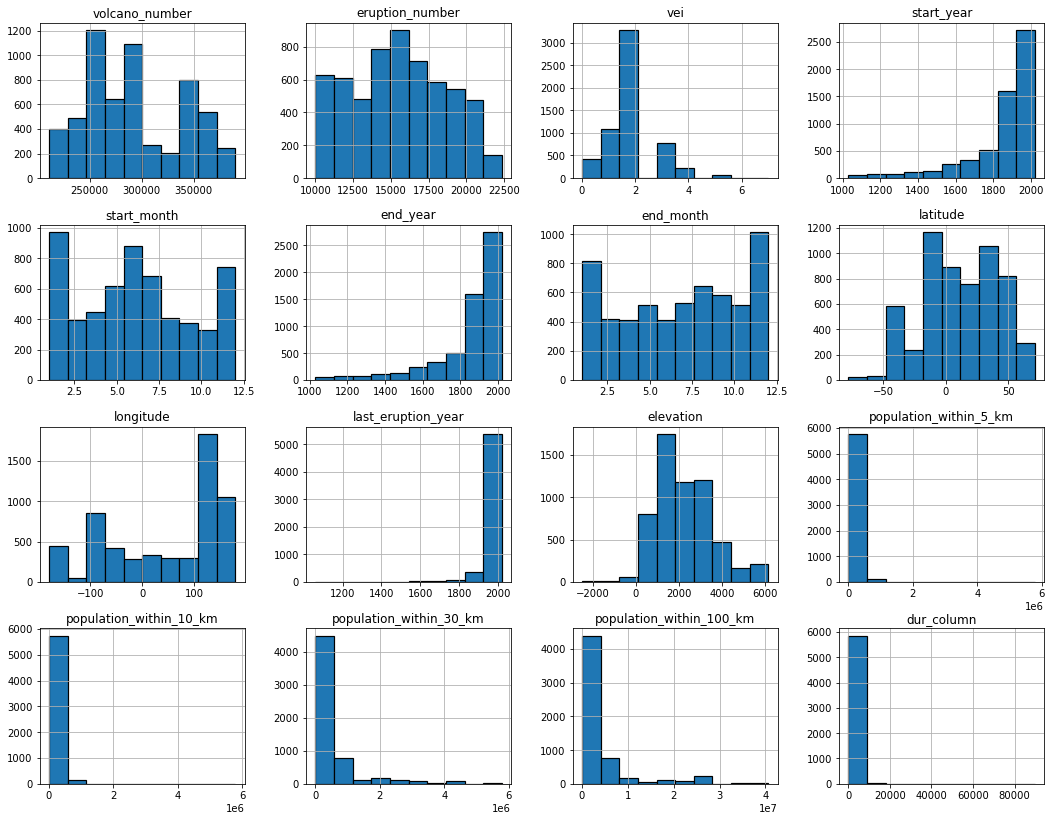

In [23]:
# Histograms with the distribution of the cleaned dataset
df_clean.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(18,14)
plt.show()

Using one hot encoding to transform categorical variables into numerical variables and use them as predictors.
<br>
Variables being transformed: major_rocks 1 to 5, primary_volcano_type and tectonic_settings


In [24]:
# Creating a list of categorical columns 
cat_cols = ['major_rock_1','major_rock_2','major_rock_3','major_rock_4','major_rock_5','primary_volcano_type','tectonic_settings']

In [25]:
# Creating a copy of the df_clean in memory with a different name
df_onehot = df_clean.copy()

# Converting the categorical variables to one-hot variables
df_onehot = pd.get_dummies(df_clean, columns = cat_cols, prefix = cat_cols)

df_onehot.head(10)

,volcano_number,volcano_name,eruption_number,eruption_category,vei,start_year,start_month,end_year,end_month,latitude,...,tectonic_settings_Intraplate / Continental crust (>25 km),tectonic_settings_Intraplate / Intermediate crust (15-25 km),tectonic_settings_Intraplate / Oceanic crust (< 15 km),tectonic_settings_Rift zone / Continental crust (>25 km),tectonic_settings_Rift zone / Intermediate crust (15-25 km),tectonic_settings_Rift zone / Oceanic crust (< 15 km),tectonic_settings_Subduction zone / Continental crust (>25 km),tectonic_settings_Subduction zone / Crustal thickness unknown,tectonic_settings_Subduction zone / Intermediate crust (15-25 km),tectonic_settings_Subduction zone / Oceanic crust (< 15 km)
0,266030,Soputan,22354,Confirmed Eruption,3,2020,3,2020.0,4.0,1.112,...,0,0,0,0,0,0,1,0,0,0
1,266030,Soputan,22293,Confirmed Eruption,3,2018,10,2018.0,12.0,1.112,...,0,0,0,0,0,0,1,0,0,0
2,266030,Soputan,22105,Confirmed Eruption,3,2016,1,2016.0,2.0,1.112,...,0,0,0,0,0,0,1,0,0,0
3,266030,Soputan,20988,Confirmed Eruption,3,2015,1,2015.0,3.0,1.112,...,0,0,0,0,0,0,1,0,0,0
4,266030,Soputan,20821,Confirmed Eruption,3,2012,8,2012.0,9.0,1.112,...,0,0,0,0,0,0,1,0,0,0
5,266030,Soputan,20820,Confirmed Eruption,3,2011,7,2011.0,8.0,1.112,...,0,0,0,0,0,0,1,0,0,0
6,266030,Soputan,16439,Confirmed Eruption,3,2008,6,2008.0,11.0,1.112,...,0,0,0,0,0,0,1,0,0,0
7,266030,Soputan,16438,Confirmed Eruption,3,2007,6,2007.0,11.0,1.112,...,0,0,0,0,0,0,1,0,0,0
8,266030,Soputan,16434,Confirmed Eruption,1,2006,12,2006.0,12.0,1.112,...,0,0,0,0,0,0,1,0,0,0
9,266030,Soputan,16433,Confirmed Eruption,1,2005,12,2006.0,1.0,1.112,...,0,0,0,0,0,0,1,0,0,0


In [26]:
df_onehot.describe()

,volcano_number,eruption_number,vei,start_year,start_month,end_year,end_month,latitude,longitude,last_eruption_year,...,tectonic_settings_Intraplate / Continental crust (>25 km),tectonic_settings_Intraplate / Intermediate crust (15-25 km),tectonic_settings_Intraplate / Oceanic crust (< 15 km),tectonic_settings_Rift zone / Continental crust (>25 km),tectonic_settings_Rift zone / Intermediate crust (15-25 km),tectonic_settings_Rift zone / Oceanic crust (< 15 km),tectonic_settings_Subduction zone / Continental crust (>25 km),tectonic_settings_Subduction zone / Crustal thickness unknown,tectonic_settings_Subduction zone / Intermediate crust (15-25 km),tectonic_settings_Subduction zone / Oceanic crust (< 15 km)
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.00000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,...,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,292882.062425,15590.964864,1.915572,1845.410029,6.14600,1846.813577,6.838479,12.100893,45.224036,1992.314685,...,0.010063,0.002388,0.064813,0.021491,0.002388,0.053727,0.681903,0.039229,0.046393,0.077605
std,45732.849665,3145.841606,0.935411,191.547895,3.20533,191.306136,3.366401,30.147746,109.156567,70.676799,...,0.099818,0.048811,0.246217,0.145026,0.048811,0.225497,0.465777,0.194156,0.210352,0.267572
min,211010.000000,10008.000000,0.000000,1030.000000,1.00000,1030.000000,1.000000,-77.530000,-179.970000,1060.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263130.000000,13119.000000,1.000000,1812.000000,4.00000,1814.000000,4.000000,-7.942000,-71.930000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,283120.000000,15614.000000,2.000000,1910.000000,6.00000,1912.000000,7.000000,11.538000,106.700000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,341110.000000,17966.500000,2.000000,1967.000000,8.00000,1968.000000,10.000000,37.100000,138.523000,2020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,390140.000000,22354.000000,7.000000,2020.000000,12.00000,2020.000000,12.000000,71.082000,179.580000,2020.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Creating subset of df to create scatter plot matrix
df_sub = df_onehot[['vei','elevation','population_within_5_km','population_within_10_km','population_within_30_km','population_within_100_km']]

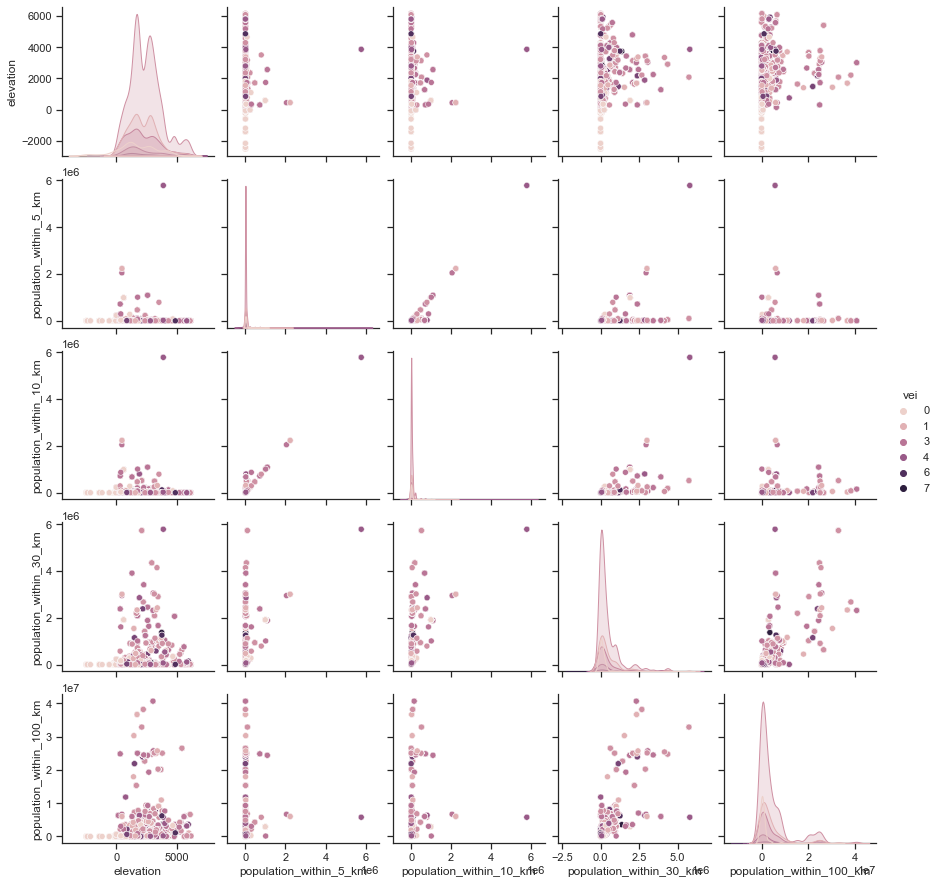

In [32]:
# Scatter plot matrix
sns.set_theme(style='ticks')
sns.pairplot(df_sub, hue='vei')

In [37]:
# Filtering dataset to get only significant eruptions (VEI > 4)
# Using filtered VEI ONLY for exploratory data analysis of significant volcanic eruptions

df_significant = df_clean[df_clean['vei'] > 4] 
df_significant.shape

(69, 34)

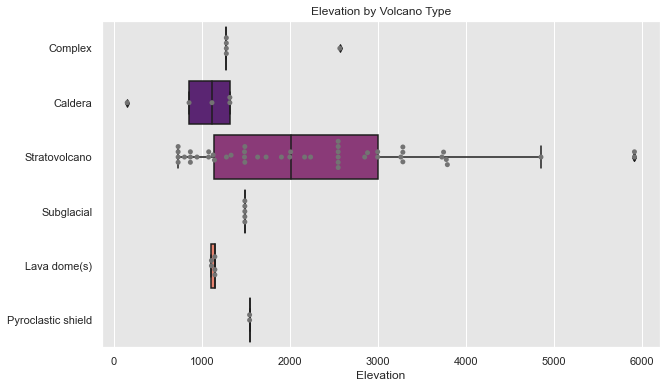

In [38]:
# Boxplot of elevation by volcano type
plt.figure(figsize = (10,6))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})

g = sns.boxplot(x = df_significant.elevation, y = df_significant.primary_volcano_type, palette = 'magma')
g = sns.swarmplot(x = df_significant.elevation, y = df_significant.primary_volcano_type, color = '.45')

plt.xlabel("Elevation")
plt.ylabel("")
plt.title("Elevation by Volcano Type")

plt.show()

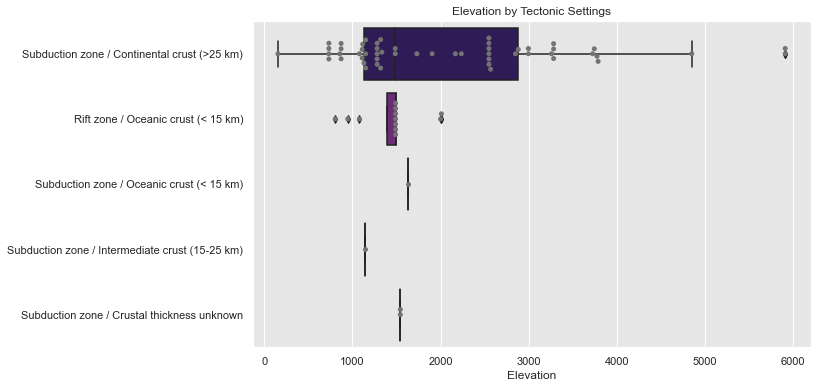

In [39]:
# Boxplot of elevation by tectonic settings
plt.figure(figsize = (10,6))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})

g = sns.boxplot(x = df_significant.elevation, y = df_significant.tectonic_settings, palette = 'magma')
g = sns.swarmplot(x = df_significant.elevation, y = df_significant.tectonic_settings, color = '.45')

plt.xlabel("Elevation")
plt.ylabel("")
plt.title("Elevation by Tectonic Settings")

plt.show()

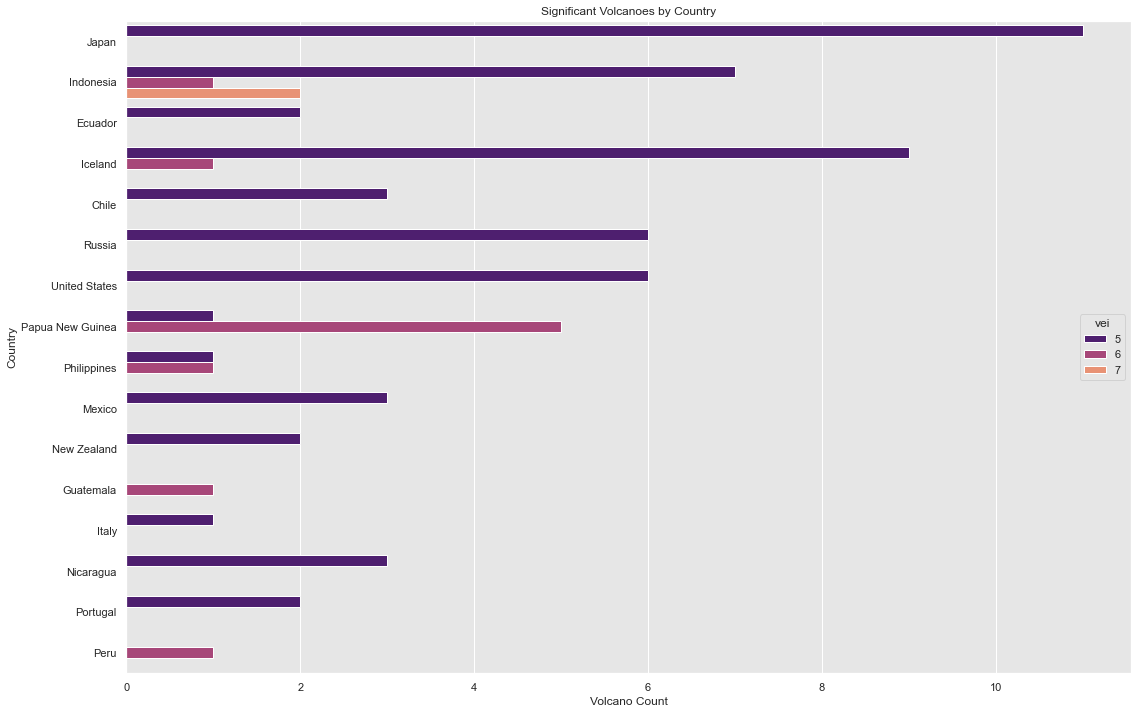

In [40]:
# Bar plot of significant volcano by country
fig, ax = plt.subplots(figsize = (18,12))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})

sns.countplot(data = df_significant, y = 'country', hue = 'vei', ax = ax, palette = 'magma')

plt.xlabel("Volcano Count")
plt.ylabel("Country")
plt.title("Significant Volcanoes by Country")

plt.show()

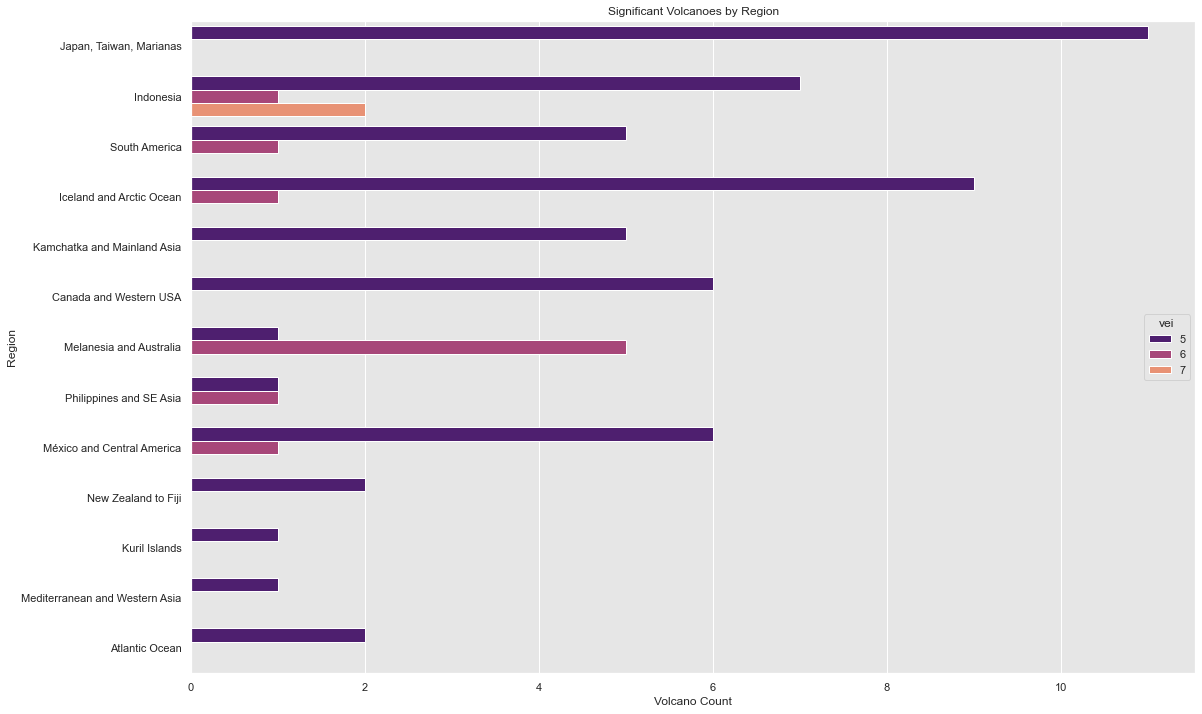

In [41]:
# Bar plot of significant volcano by region
fig, ax = plt.subplots(figsize = (18,12))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})

sns.countplot(data = df_significant, y = 'region', hue = 'vei', ax = ax, palette = 'magma')

plt.xlabel("Volcano Count")
plt.ylabel("Region")
plt.title("Significant Volcanoes by Region")

plt.show()

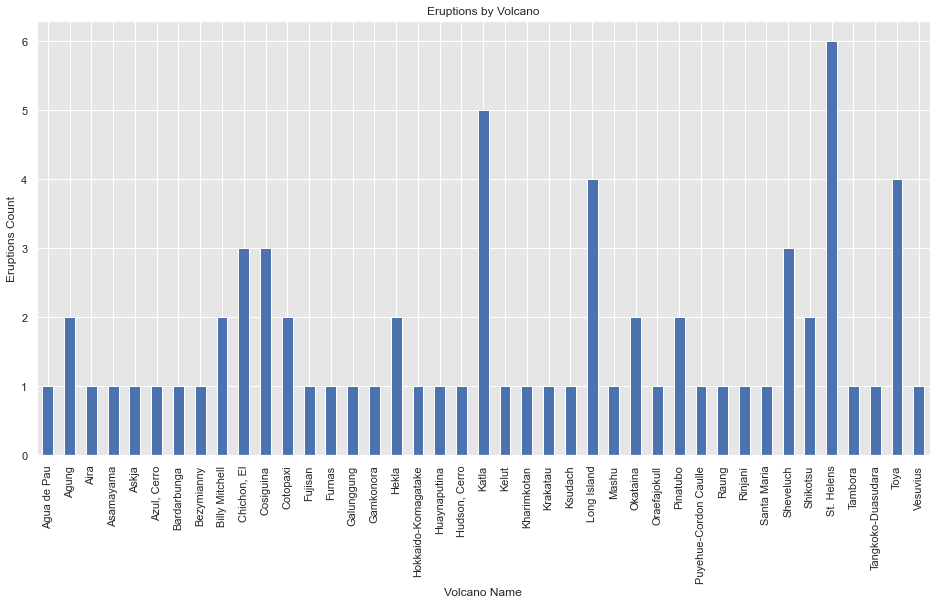

In [42]:
# Bar plot of eruptions by volcano
fig, ax = plt.subplots(figsize=(16,8))

df_significant.groupby(['volcano_name']).count()['eruption_number'].plot.bar(ax=ax)

plt.xlabel("Volcano Name")
plt.ylabel("Eruptions Count")
plt.title("Eruptions by Volcano")

plt.show()